In [1]:
# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Wczytywanie danych
test_df = pd.read_csv("titanic/test.csv")
train_df = pd.read_csv("titanic/train.csv")

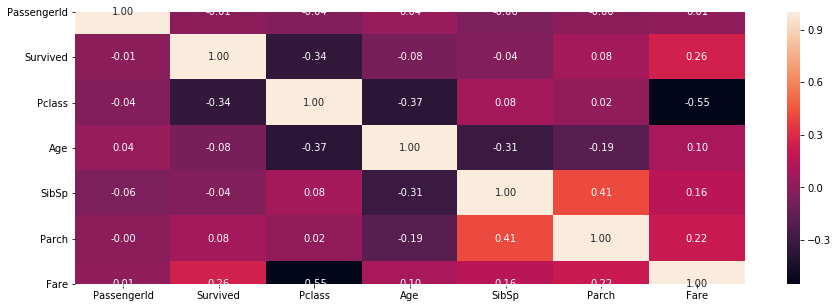

In [3]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f")
plt.show()

In [4]:
drop_columns = ['Name', 'Ticket', 'PassengerId', 'Cabin', 'Embarked']
passenger_id = test_df[['PassengerId']]
test_df.drop(columns=drop_columns, inplace=True)
train_df.drop(columns=drop_columns, inplace=True)

In [5]:
print(pd.DataFrame(test_df.isnull().sum()).T)
print(pd.DataFrame(train_df.isnull().sum()).T)

   Pclass  Sex  Age  SibSp  Parch  Fare
0       0    0   86      0      0     1
   Survived  Pclass  Sex  Age  SibSp  Parch  Fare
0         0       0    0  177      0      0     0


In [6]:
# Obróbka danych
test_df['Age'].fillna(test_df.Age.median(), inplace=True)
train_df['Age'].fillna(train_df.Age.median(), inplace=True)
test_df = test_df.replace(np.nan, 0)
train_df = train_df.replace(np.nan, 0)

In [7]:
# Mapowanie Płci na 0 1
sex_map = { 'male': 1, 'female': 0}
test_df['Sex'] = test_df['Sex'].map(sex_map)
train_df['Sex'] = train_df['Sex'].map(sex_map)

In [8]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [34]:
# podział na zbiór testowy i treningowy
X_train = train_df.iloc[:,1:]
y_train = train_df[['Survived']]
X_test = test_df

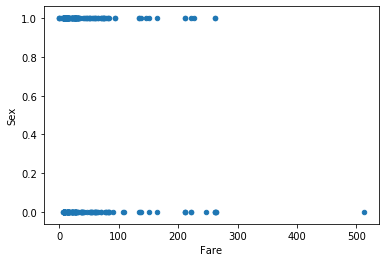

In [39]:
X_test.plot(kind='scatter',x='Fare',y='Sex')


In [11]:
#y_pred = model.predict(X_test)

In [12]:
#round(model.score(X_train, y_train)*100, 2)

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 230, criterion = 'gini', random_state= 10, max_depth=9)
classifier.fit(X_train, y_train)

/home/tumnus/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [31]:
y_pred = classifier.predict(X_test)
print(passenger_id.shape)
print(y_pred.shape)
print(X_test.shape)


(418, 1)
(418,)
(418, 6)


In [22]:
round(classifier.score(X_train, y_train)*100, 2)

92.82

In [23]:
submission = pd.DataFrame({
        "PassengerId": np.ravel(passenger_id.values),
        "Survived": np.ravel(y_pred)
    })

In [40]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [46]:
print(submission[submission['Survived'] == 1].count())
print(submission[submission['Survived'] == 0].count())

PassengerId    141
Survived       141
dtype: int64
PassengerId    277
Survived       277
dtype: int64


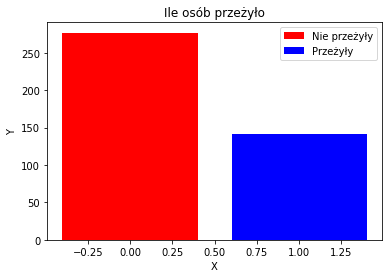

In [50]:
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Ile osób przeżyło")
plt.bar(0,submission[submission['Survived'] == 0].count(), label='Nie przeżyły', color ='r')
plt.bar(1,submission[submission['Survived'] == 1].count(), label='Przeżyły',color = 'b')
plt.legend()
plt.show()